# PRCP-1000-ProtugeseBank

# Table of Contents

# 1.Introduction

In today’s competitive financial market, understanding customer behavior is critical for optimizing marketing strategies. The Portuguese banking institution conducted targeted phone call campaigns to promote term deposits among existing customers. This project focuses on analyzing these campaigns to gain insights, predict customer behavior, and suggest actionable strategies for increasing term deposit adoption.

##  Problem Statement

The bank aims to increase the adoption of term deposits by identifying potential customers who are likely to subscribe. This involves analyzing past campaign data, building predictive models, and offering data-driven recommendations to enhance marketing effectiveness.

## Objectives

##  Dataset Overview

# 2.Data Understanding

##  Attribute Information

## Dataset Description

##  Initial Observations

# 3.Data Preparation

Load the raw data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:\\Users\\lenovo\\Downloads\\PRCP-1000-ProtugeseBank\\Data\\bank-additional\\bank-additional-full.csv", sep=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [6]:
# shape
data.shape

(41188, 21)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data.isnull().sum()
# There is no null values.

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 12


In [11]:
data=data.drop_duplicates()

In [12]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [13]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 4.Exploratory Data Analysis (EDA)

## Visualization of the data

In [15]:

# Histogram

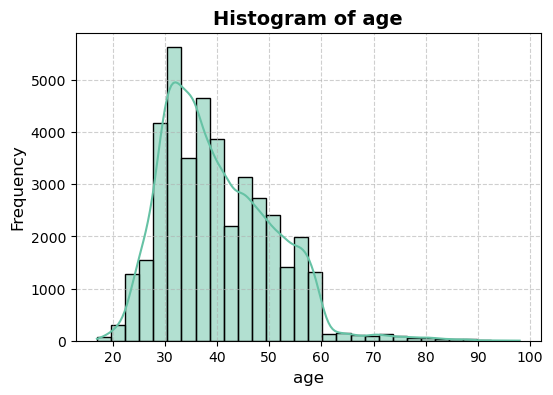

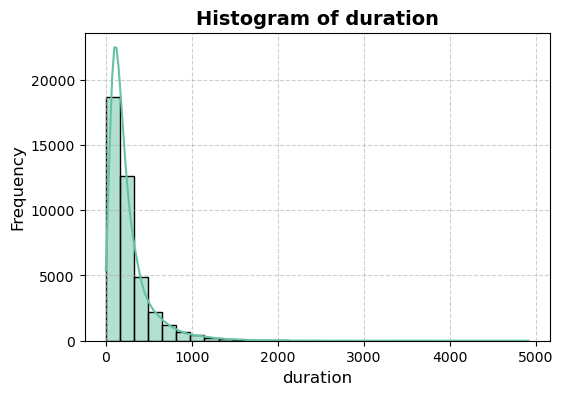

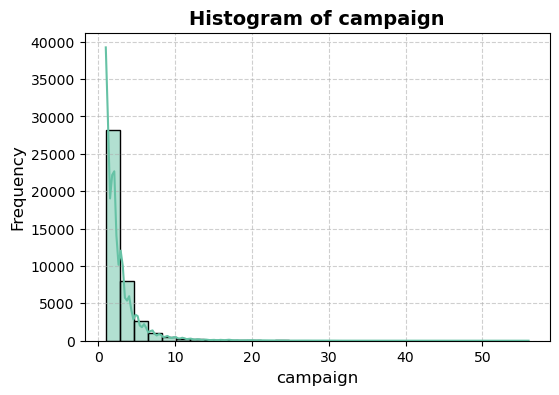

In [16]:
# List of specific columns for which you want to plot histograms
specific_columns = ['age', 'duration', 'campaign']

# Using Seaborn's color palette for a more colorful histogram
for column in specific_columns:
    plt.figure(figsize=(6, 4))
    
    # Plotting histogram with color for bars and KDE line color
    sns.histplot(data[column], kde=True, bins=30, color=sns.color_palette('Set2')[0], 
                 line_kws={'color': sns.color_palette('Set2')[1]})
    
    # Adding title, labels, and grid
    plt.title(f"Histogram of {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    
    plt.show()

In [17]:
#subplots

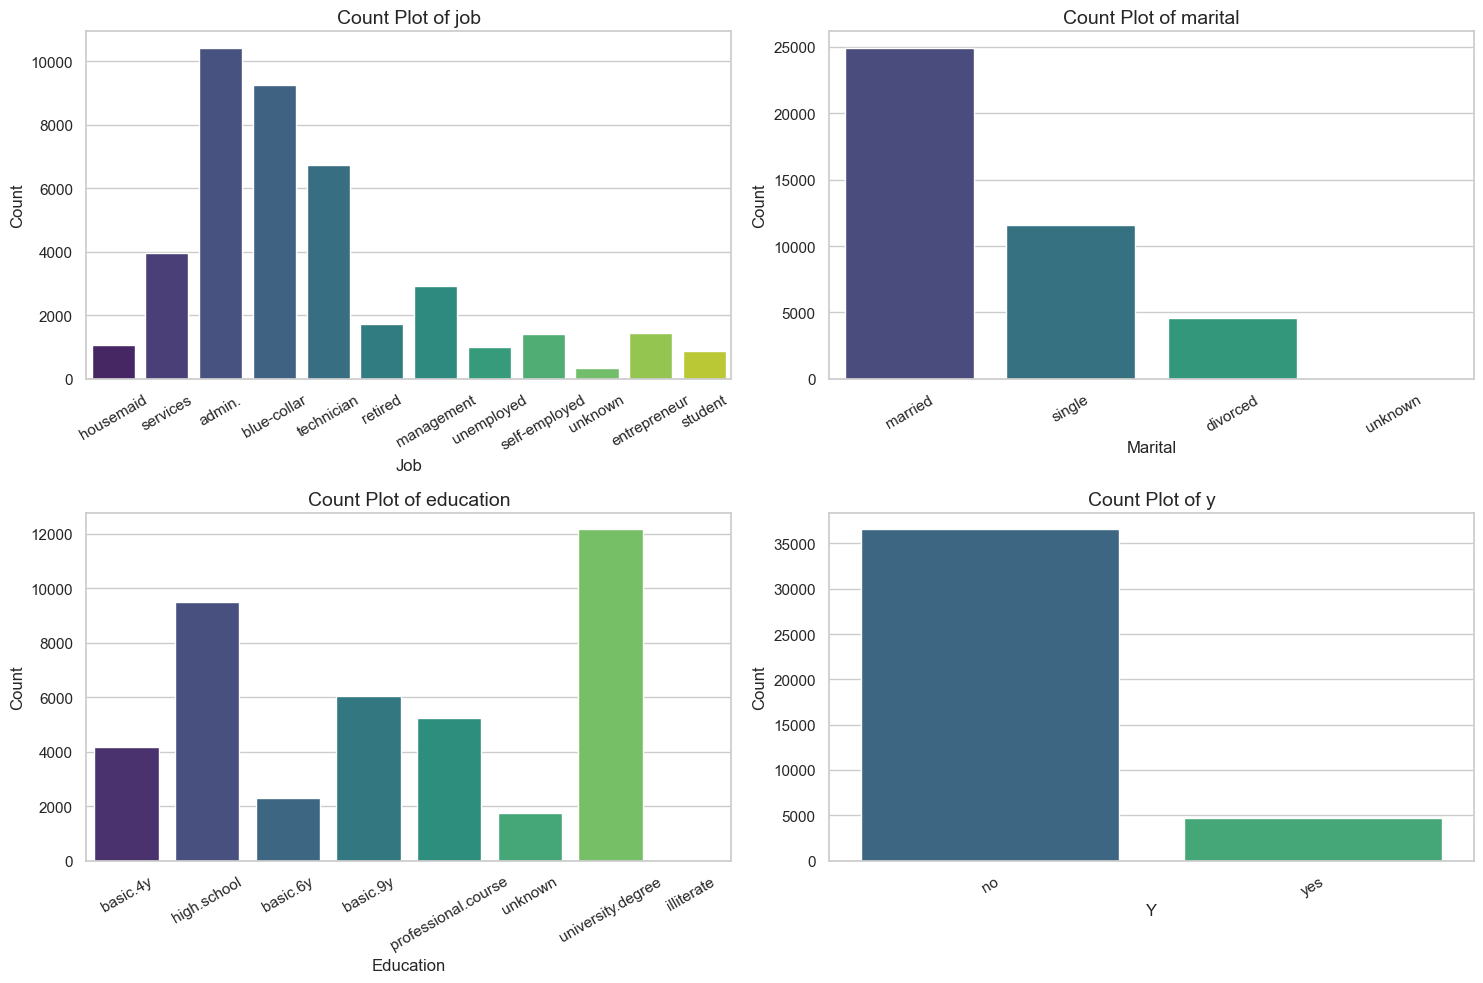

In [18]:
# Select the features to visualize
features_to_plot = ['job', 'marital', 'education', 'y']

# Set a colorful style
sns.set(style="whitegrid", palette="pastel")

# Create subplots for count plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=feature, palette="viridis")
    plt.title(f'Count Plot of {feature}', fontsize=14)
    plt.xlabel(feature.capitalize(), fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=30)

# Adjust layout
plt.tight_layout()
plt.show()

In [19]:
# subplots

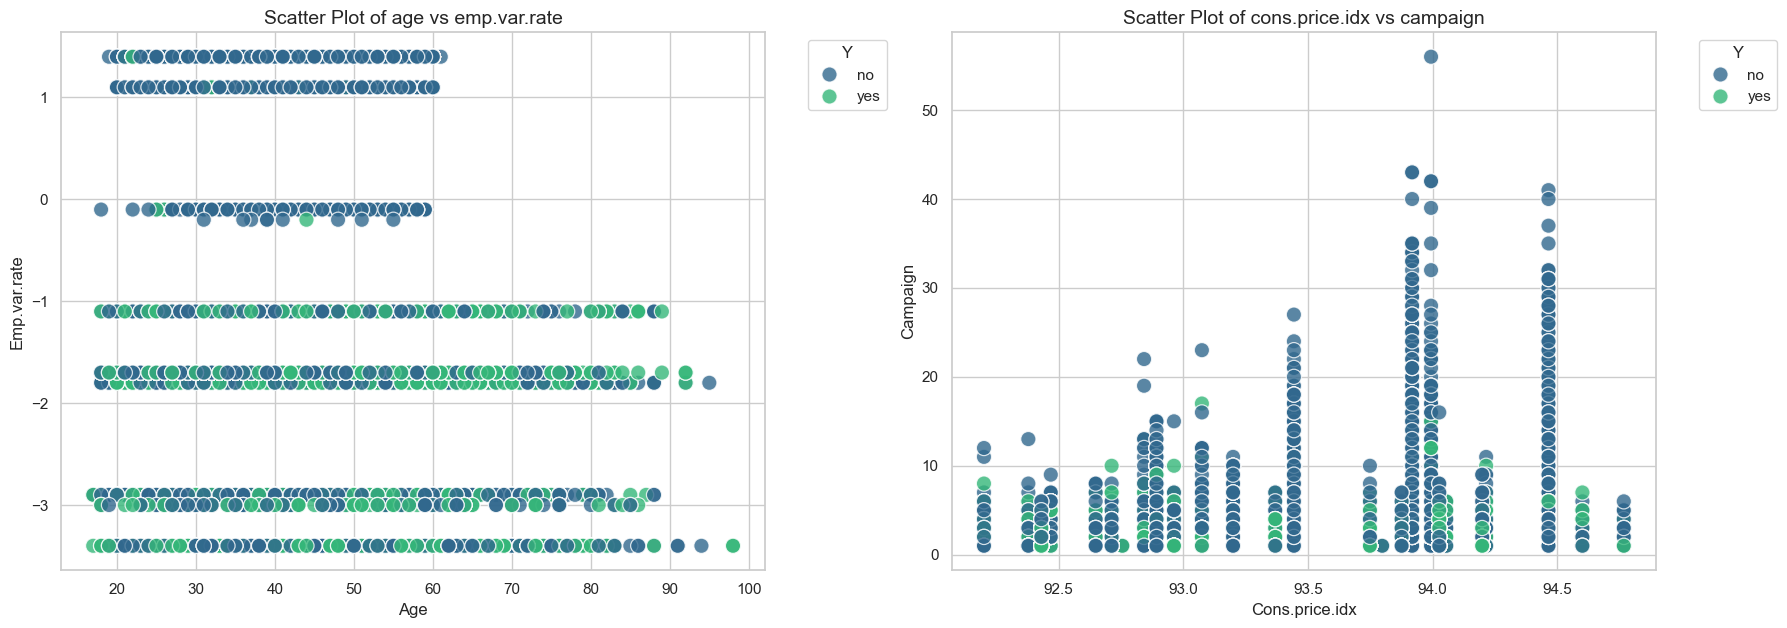

In [20]:
# Updated feature combinations for scatter plots
scatter_features = [
    ('age', 'emp.var.rate', 'y'),
    ('cons.price.idx', 'campaign', 'y')
]

# Set a colorful style
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(18, 12))
for i, (x_feature, y_feature, hue_feature) in enumerate(scatter_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(
        data=data,
        x=x_feature,
        y=y_feature,
        hue=hue_feature,
        palette="viridis",  # Use a vibrant color palette
        s=120,
        alpha=0.8  # Add transparency for better visualization of overlapping points
    )
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}', fontsize=14)
    plt.xlabel(x_feature.replace("_", " ").capitalize(), fontsize=12)
    plt.ylabel(y_feature.replace("_", " ").capitalize(), fontsize=12)
    plt.legend(title=hue_feature.capitalize(), bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()


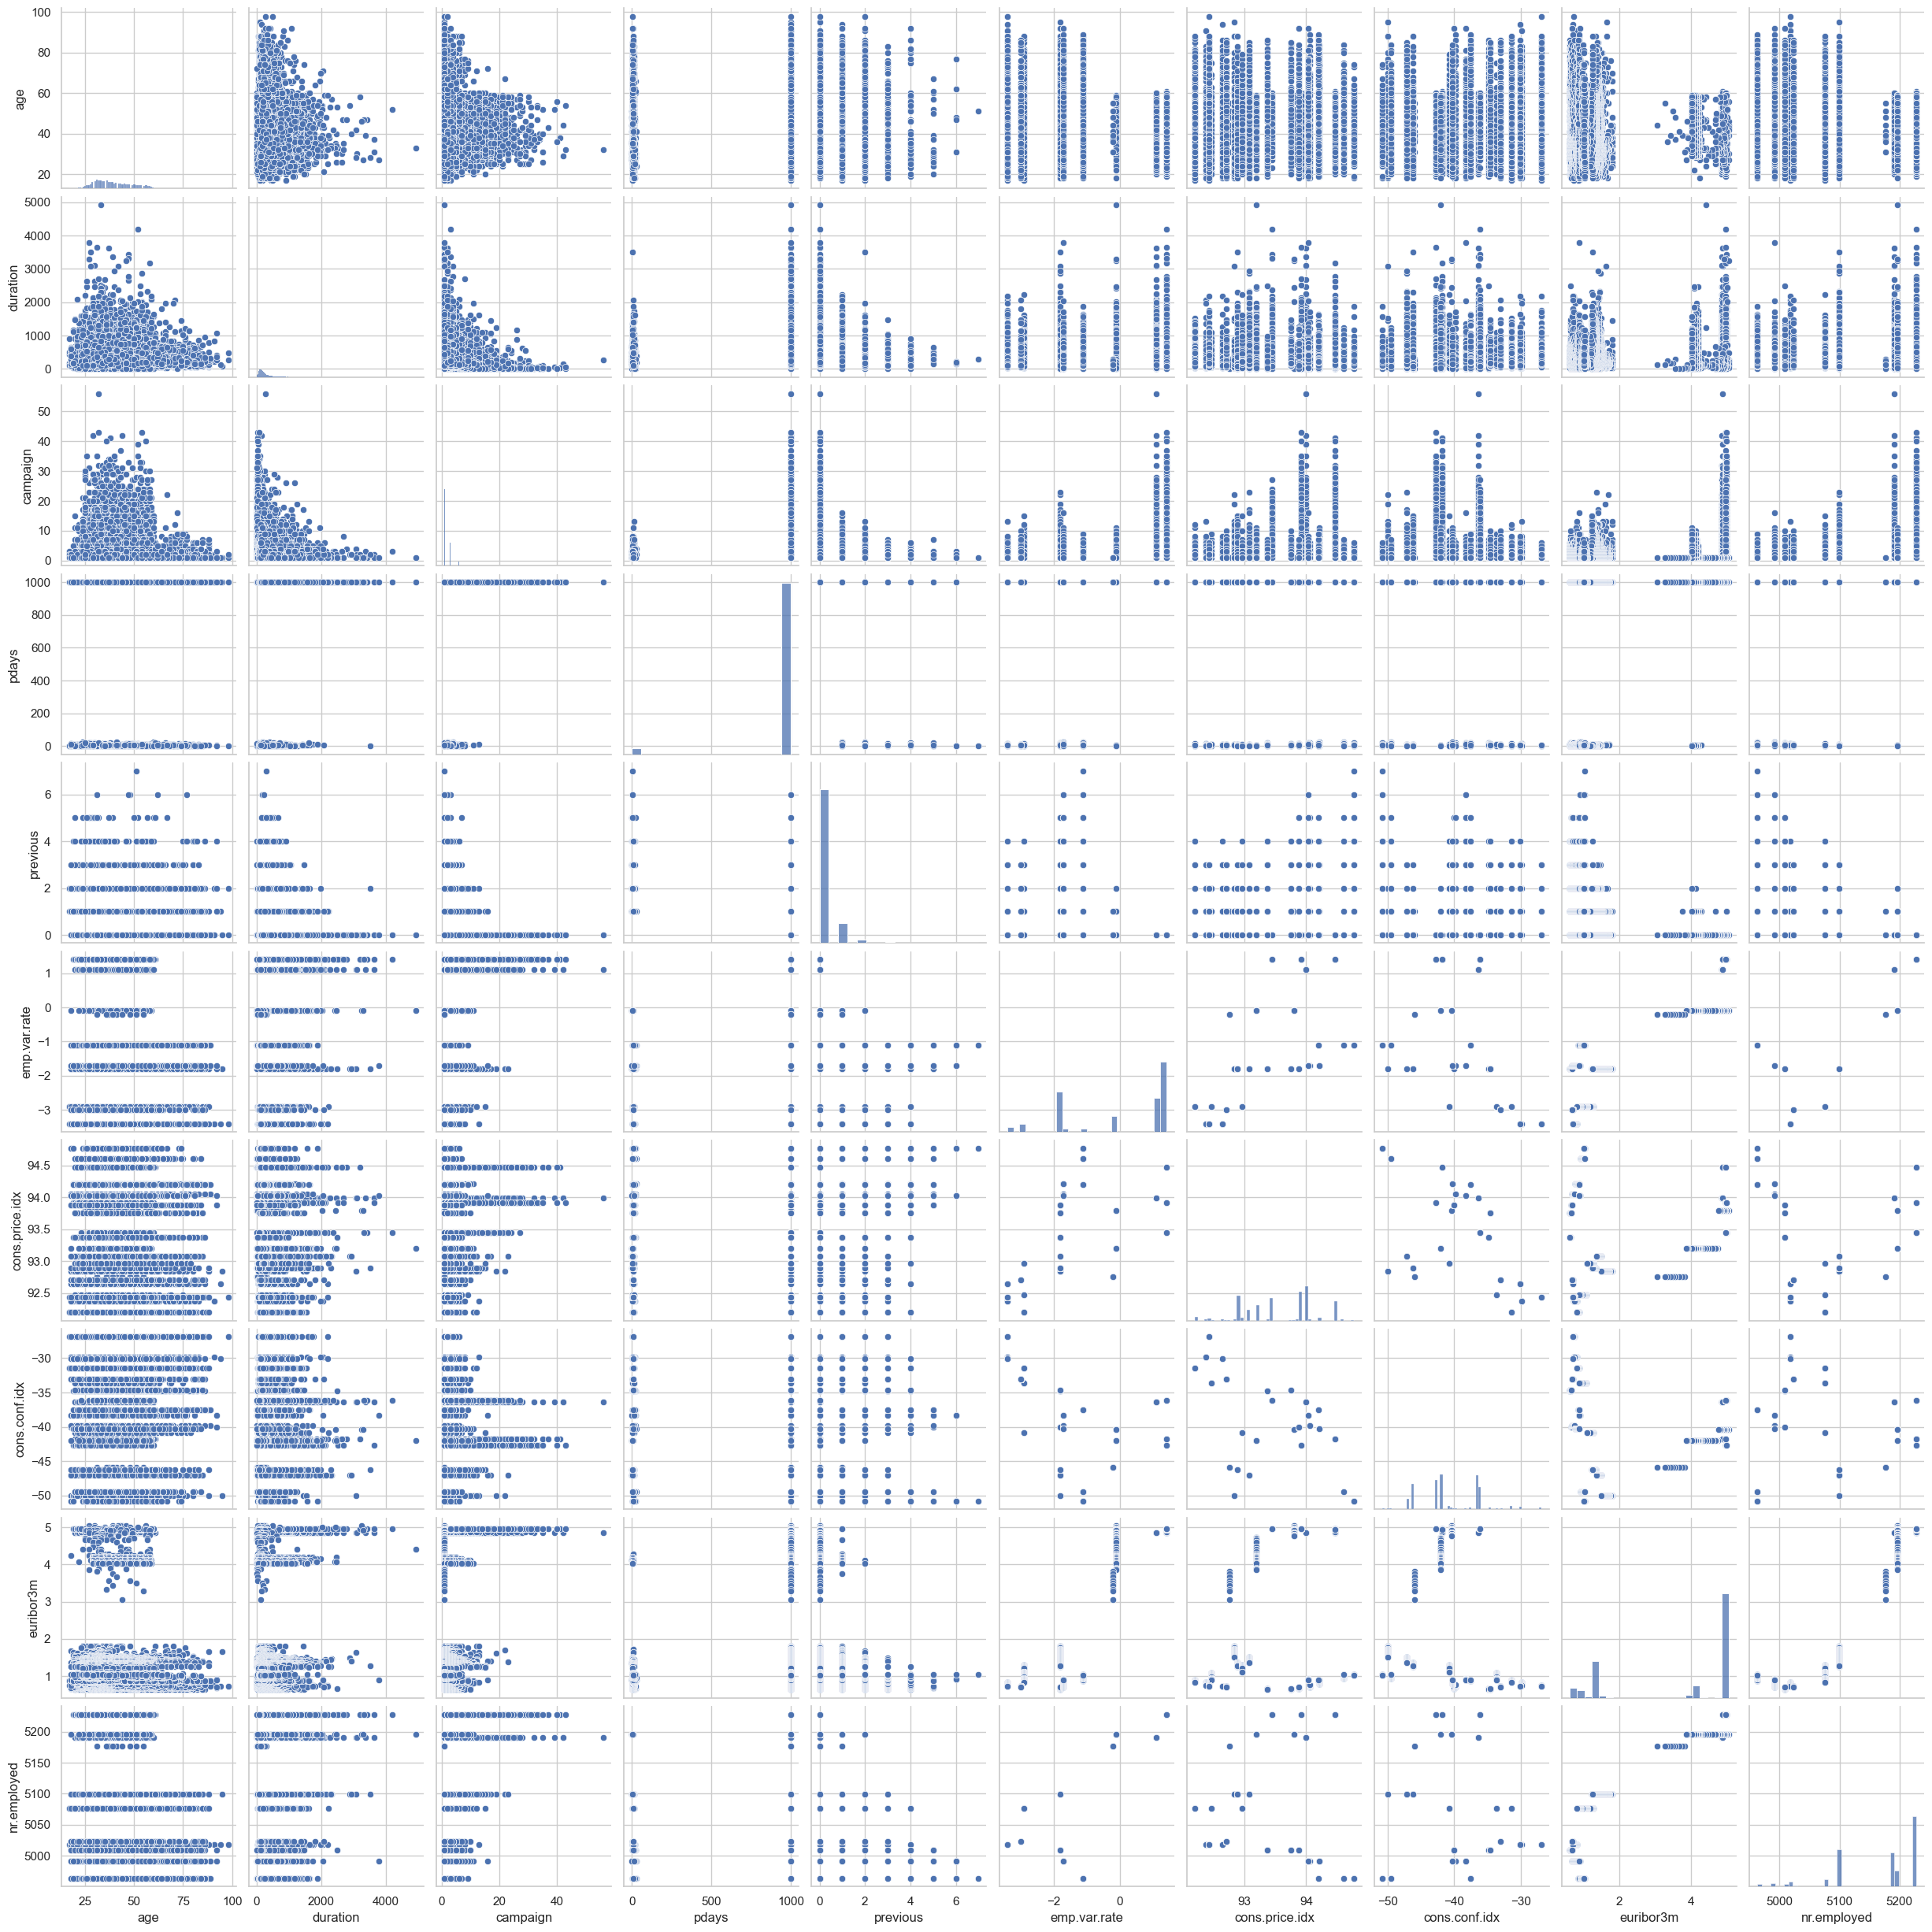

In [21]:
sns.pairplot(data)

In [22]:
# heatmap

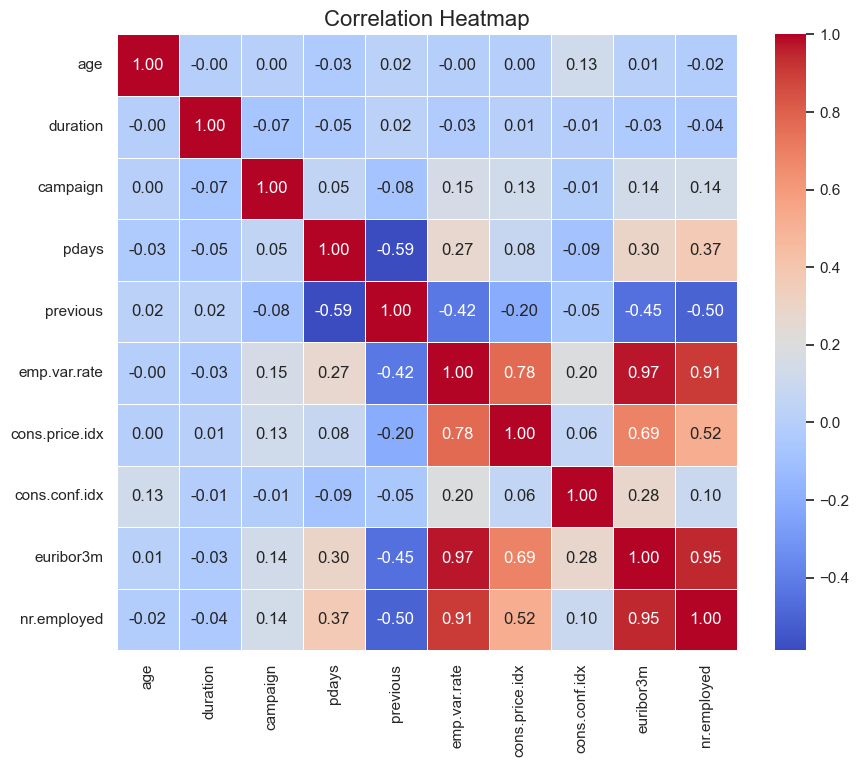

In [23]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

## 5.Feature Engineering

## Encoding Technique 

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['y'] = le.fit_transform(data['y'])

In [25]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
data.tail(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0


In [27]:
data['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import OrdinalEncoder
custom_order= ["admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"]

ordinal_encoder = OrdinalEncoder(categories=[custom_order])
data['job_encoded'] = ordinal_encoder.fit_transform(data[['job']])
data.drop('job', axis=1, inplace=True)

In [29]:
data.head(5)

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_encoded
0,56,married,basic.4y,no,no,no,telephone,may,mon,261,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,4.0
1,57,married,high.school,unknown,no,no,telephone,may,mon,149,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,11.0
2,37,married,high.school,no,yes,no,telephone,may,mon,226,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,11.0
3,40,married,basic.6y,no,no,no,telephone,may,mon,151,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.0
4,56,married,high.school,no,no,yes,telephone,may,mon,307,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,11.0


In [30]:
data['marital'].value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["married","divorced","single","unknown"]])
data['marital_encoded'] = ordinal_encoder.fit_transform(data[['marital']])
data.drop('marital', axis=1, inplace=True)

In [32]:
data['education'].value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [33]:
encoded_education = OrdinalEncoder(categories=[["basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown"]])


data['education_encoded'] = encoded_education.fit_transform(data[['education']])

data.drop('education', axis=1, inplace=True)

In [34]:
data['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [35]:
default_encoded = OrdinalEncoder(categories=[["no","yes","unknown"]])
data['default_encoded'] = default_encoded.fit_transform(data[['default']])
data.drop('default', axis=1, inplace=True)

In [36]:
data['housing'].value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

In [37]:
default_encoded = OrdinalEncoder(categories=[['no', 'yes','unknown']])
data['housing_encoded'] = default_encoded.fit_transform(data[['housing']])
data.drop('housing', axis=1, inplace=True)

In [38]:
data['loan'].value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

In [39]:
default_encoded = OrdinalEncoder(categories=[['no', 'yes','unknown']])
data['loan_encoded'] = default_encoded.fit_transform(data[['loan']])
data.drop('loan', axis=1, inplace=True)

In [40]:
data['contact'].value_counts()

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

In [41]:

default_encoded = OrdinalEncoder(categories=[['telephone','cellular']])
data['contact_encoded'] = default_encoded.fit_transform(data[['contact']])
data.drop('contact', axis=1, inplace=True)

In [42]:
data['month'].value_counts()

month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [43]:
default_encoded = OrdinalEncoder(categories=[['jan', 'feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']])
data['month_encoded'] = default_encoded.fit_transform(data[['month']])
data.drop('month', axis=1, inplace=True)

In [44]:
data.head(2)

,age,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,nr.employed,y,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded
0,56,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,...,5191.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,57,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,...,5191.0,0,11.0,0.0,3.0,2.0,0.0,0.0,0.0,4.0


In [45]:
data['day_of_week'].value_counts()

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64

In [46]:
default_encoded = OrdinalEncoder(categories=[['mon', 'tue','wed','thu','fri']])
data['day_of_week_encoded'] = default_encoded.fit_transform(data[['day_of_week']])
data.drop('day_of_week', axis=1, inplace=True)

In [47]:
data['poutcome'].value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

In [48]:
data['poutcome'].value_counts()
default_encoded = OrdinalEncoder(categories=[['failure','nonexistent','success']])
data['poutcome_encoded'] = default_encoded.fit_transform(data[['poutcome']])
data.drop('poutcome', axis=1, inplace=True)

In [49]:
data.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,11.0,0.0,3.0,2.0,0.0,0.0,0.0,4.0,0.0,1.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,11.0,0.0,3.0,0.0,1.0,0.0,0.0,4.0,0.0,1.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,11.0,0.0,3.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0


In [50]:

data['job_encoded'] = data['job_encoded'].astype(int)
data['marital_encoded'] = data['marital_encoded'].astype(int)
data['education_encoded'] = data['education_encoded'].astype(int)
data['default_encoded'] = data['default_encoded'].astype(int)
data['housing_encoded'] = data['housing_encoded'].astype(int)
data['loan_encoded'] = data['loan_encoded'].astype(int)
data['contact_encoded']=data['contact_encoded'].astype(int)
data['month_encoded'] = data['month_encoded'].astype(int)
data['day_of_week_encoded']=data['day_of_week_encoded'].astype(int)
data['poutcome_encoded'] = data['poutcome_encoded'].astype(int)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  41176 non-null  int64  
 1   duration             41176 non-null  int64  
 2   campaign             41176 non-null  int64  
 3   pdays                41176 non-null  int64  
 4   previous             41176 non-null  int64  
 5   emp.var.rate         41176 non-null  float64
 6   cons.price.idx       41176 non-null  float64
 7   cons.conf.idx        41176 non-null  float64
 8   euribor3m            41176 non-null  float64
 9   nr.employed          41176 non-null  float64
 10  y                    41176 non-null  int32  
 11  job_encoded          41176 non-null  int32  
 12  marital_encoded      41176 non-null  int32  
 13  education_encoded    41176 non-null  int32  
 14  default_encoded      41176 non-null  int32  
 15  housing_encoded      41176 non-null  int3

In [52]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,4,0,0,0,0,0,0,4,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,11,0,3,2,0,0,0,4,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,11,0,3,0,1,0,0,4,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,4,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,11,0,3,0,0,1,0,4,0,1


In [53]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,5.598601,0.679498,3.746916,0.417598,0.571959,0.199825,0.634714,5.607733,1.979600,0.930081
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,4.010713,0.889462,2.136539,0.812866,0.541216,0.456055,0.481516,2.041013,1.411539,0.362937
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,7.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,5.000000,2.000000,1.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,10.000000,2.000000,6.000000,0.000000,1.000000,0.000000,1.000000,7.000000,3.000000,1.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,11.000000,4.000000,2.000000


In [54]:
# boxplot --> for outliers

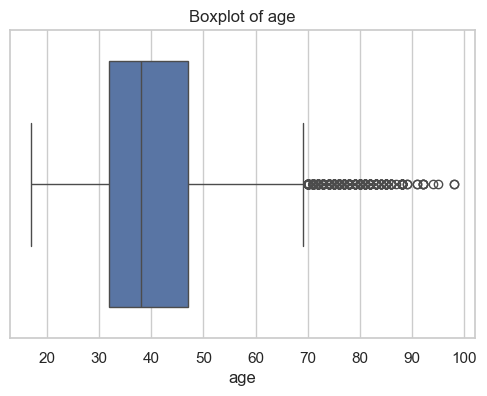

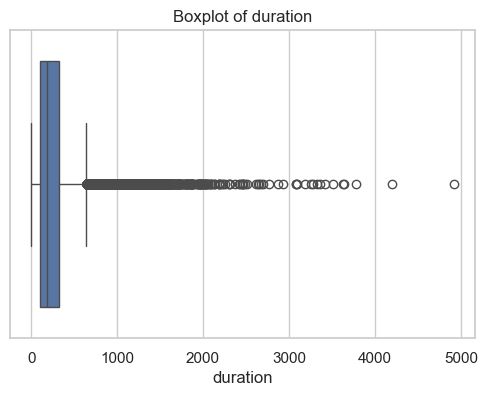

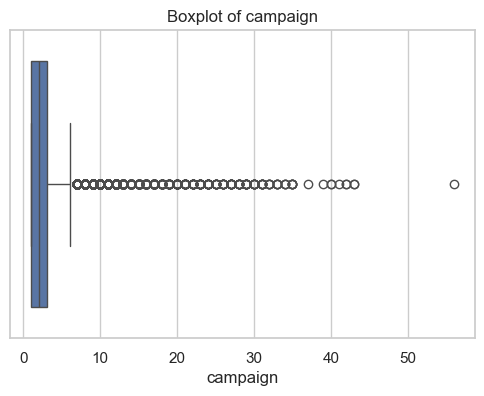

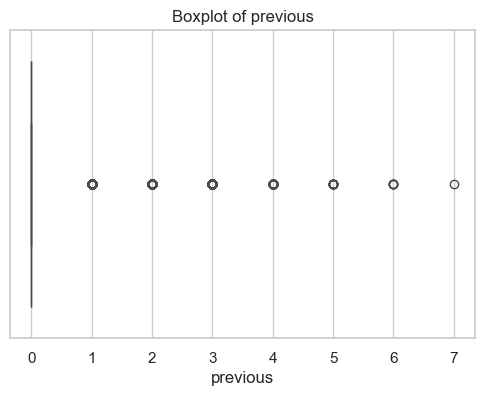

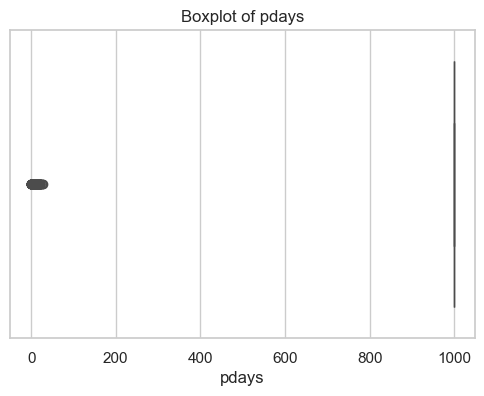

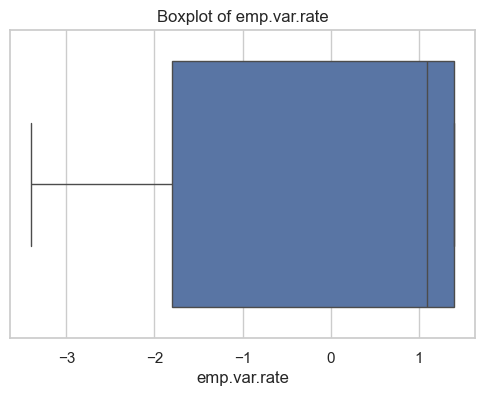

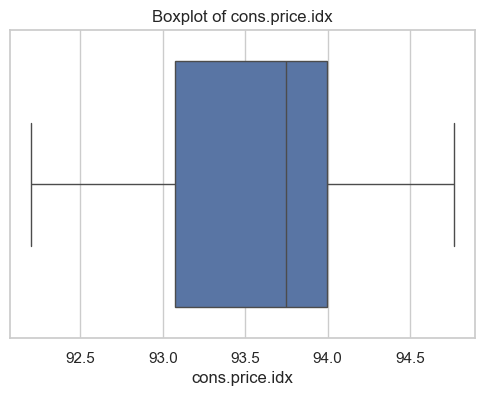

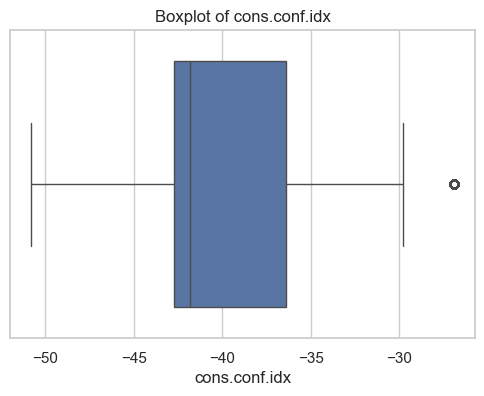

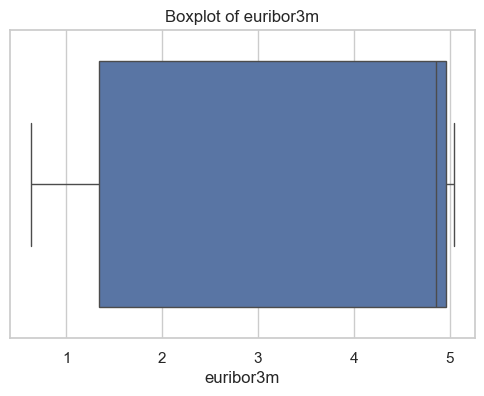

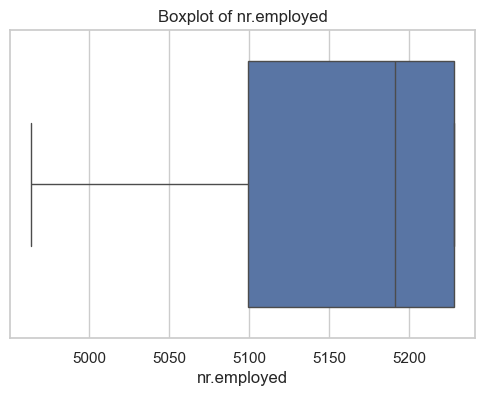

In [57]:
columns_to_check = ['age', 'duration', 'campaign', 'previous', 'pdays', 'emp.var.rate',
                    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()

In [58]:
columns_to_check = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate']

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]


In [59]:
# Normalizations

In [60]:
from sklearn.preprocessing import MinMaxScaler


sc = MinMaxScaler()
columns_to_scale = [
    'age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
    'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
    'job_encoded', 'marital_encoded', 'education_encoded',
    'default_encoded', 'housing_encoded', 'loan_encoded', 'contact_encoded',
    'month_encoded', 'poutcome_encoded', 'day_of_week_encoded'
]
data[columns_to_scale] = sc.fit_transform(data[columns_to_scale])

In [61]:
data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,job_encoded,marital_encoded,education_encoded,default_encoded,housing_encoded,loan_encoded,contact_encoded,month_encoded,day_of_week_encoded,poutcome_encoded
0,0.745098,0.405280,0.0,0.0,0.0,0.90625,0.615614,0.888889,0.957379,0.859735,...,0.363636,0.0,0.000000,0.0,0.0,0.0,0.0,0.222222,0.0,0.0
1,0.764706,0.231366,0.0,0.0,0.0,0.90625,0.615614,0.888889,0.957379,0.859735,...,1.000000,0.0,0.428571,1.0,0.0,0.0,0.0,0.222222,0.0,0.0
2,0.372549,0.350932,0.0,0.0,0.0,0.90625,0.615614,0.888889,0.957379,0.859735,...,1.000000,0.0,0.428571,0.0,0.5,0.0,0.0,0.222222,0.0,0.0
3,0.431373,0.234472,0.0,0.0,0.0,0.90625,0.615614,0.888889,0.957379,0.859735,...,0.000000,0.0,0.142857,0.0,0.0,0.0,0.0,0.222222,0.0,0.0
4,0.745098,0.476708,0.0,0.0,0.0,0.90625,0.615614,0.888889,0.957379,0.859735,...,1.000000,0.0,0.428571,0.0,0.0,0.5,0.0,0.222222,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0.352941,0.394410,0.2,0.0,0.0,0.21875,1.000000,0.000000,0.089322,0.000000,...,0.000000,0.0,0.857143,0.0,0.0,0.0,1.0,0.888889,1.0,0.0
41181,0.372549,0.436335,0.0,0.0,0.0,0.21875,1.000000,0.000000,0.089322,0.000000,...,0.000000,0.0,0.857143,0.0,0.5,0.0,1.0,0.888889,1.0,0.0
41184,0.549020,0.594720,0.0,0.0,0.0,0.21875,1.000000,0.000000,0.089322,0.000000,...,0.636364,0.0,0.714286,0.0,0.0,0.0,1.0,0.888889,1.0,0.0
41185,0.745098,0.293478,0.2,0.0,0.0,0.21875,1.000000,0.000000,0.089322,0.000000,...,0.818182,0.0,0.857143,0.0,0.5,0.0,1.0,0.888889,1.0,0.0


In [62]:
data['y'].value_counts()

y
0    27808
1     1212
Name: count, dtype: int64

In [63]:
x = data.drop('y',axis=1)
y = data['y']

## 6.Model Building

In [64]:
# LogisticRegression

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [66]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [67]:
# Display the shapes and unique classes
print("Shapes of Train/Test Splits:")
print("x_train:", x_train.shape, "x_test:", x_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)
print("Classes in y_train:", y_train.unique())
print("Classes in y_test:", y_test.unique())

Shapes of Train/Test Splits:
x_train: (23216, 20) x_test: (5804, 20)
y_train: (23216,) y_test: (5804,)
Classes in y_train: [0 1]
Classes in y_test: [0 1]


In [68]:
# Train the logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [69]:
# Make predictions
y_pred = model.predict(x_test)

# Display predictions
print("Predictions:", y_pred)

Predictions: [0 0 0 ... 0 0 0]


In [70]:
# Evaluate the model
print("Accuracy is:", accuracy_score(y_test, y_pred) * 100)


Accuracy is: 95.9682977257064


In [71]:
# Detailed Classification Report and Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5564
           1       0.54      0.18      0.27       240

    accuracy                           0.96      5804
   macro avg       0.75      0.59      0.62      5804
weighted avg       0.95      0.96      0.95      5804

Confusion Matrix:
[[5527   37]
 [ 197   43]]


In [72]:
# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_pred = rf_model.predict(x_test)

# Evaluate the Random Forest model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred) * 100)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, rf_pred))


Random Forest Accuracy: 96.3473466574776

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5564
           1       0.61      0.32      0.42       240

    accuracy                           0.96      5804
   macro avg       0.79      0.65      0.70      5804
weighted avg       0.96      0.96      0.96      5804

Confusion Matrix for Random Forest:
[[5516   48]
 [ 164   76]]


In [74]:
# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

# Make predictions
dt_pred = dt_model.predict(x_test)

# Evaluate the Decision Tree model
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred) * 100)
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_test, dt_pred))


Decision Tree Accuracy: 94.9000689179876

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5564
           1       0.39      0.44      0.42       240

    accuracy                           0.95      5804
   macro avg       0.69      0.70      0.69      5804
weighted avg       0.95      0.95      0.95      5804

Confusion Matrix for Decision Tree:
[[5403  161]
 [ 135  105]]


In [76]:
# Gradient Boosting (XGBoost/LightGBM)

In [77]:
import xgboost as xgb
from xgboost import XGBClassifier

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(x_test)

# Evaluate the XGBoost model
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred) * 100)
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, xgb_pred))
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_test, xgb_pred))


XGBoost Accuracy: 96.33011716057891

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5564
           1       0.58      0.40      0.47       240

    accuracy                           0.96      5804
   macro avg       0.78      0.69      0.73      5804
weighted avg       0.96      0.96      0.96      5804

Confusion Matrix for XGBoost:
[[5496   68]
 [ 145   95]]


In [78]:
!pip install lightgbm


In [79]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

# Train the LightGBM model
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(x_train, y_train)

# Make predictions
lgb_pred = lgb_model.predict(x_test)

# Evaluate the LightGBM model
print("LightGBM Accuracy:", accuracy_score(y_test, lgb_pred) * 100)
print("\nClassification Report for LightGBM:")
print(classification_report(y_test, lgb_pred))
print("Confusion Matrix for LightGBM:")
print(confusion_matrix(y_test, lgb_pred))


[LightGBM] [Info] Number of positive: 972, number of negative: 22244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 23216, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041868 -> initscore=-3.130472
[LightGBM] [Info] Start training from score -3.130472
LightGBM Accuracy: 96.46795313576844

Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5564
           1       0.62      0.38      0.47       240

    accuracy                           0.96      5804
   macro avg       0.80      0.69      0.73      5804
weighted avg       0.96      0.96      0.96      5804

Confusion Matrix for LightGBM:
[[5507   57]


In [80]:
#Support Vector Machine (SVM)

In [81]:
from sklearn.svm import SVC

# Train the Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)

# Make predictions
svm_pred = svm_model.predict(x_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, svm_pred) * 100)
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_test, svm_pred))


SVM Accuracy: 96.1750516884907

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5564
           1       0.69      0.14      0.23       240

    accuracy                           0.96      5804
   macro avg       0.83      0.57      0.60      5804
weighted avg       0.95      0.96      0.95      5804

Confusion Matrix for SVM:
[[5549   15]
 [ 207   33]]


In [82]:
# Neural Network  --> Multilayer Perceptron (MLP)

In [83]:
from sklearn.neural_network import MLPClassifier

# Train the Neural Network (MLP) model
mlp_model = MLPClassifier(random_state=42)
mlp_model.fit(x_train, y_train)

# Make predictions
mlp_pred = mlp_model.predict(x_test)

# Evaluate the Neural Network model
print("Neural Network (MLP) Accuracy:", accuracy_score(y_test, mlp_pred) * 100)
print("\nClassification Report for Neural Network (MLP):")
print(classification_report(y_test, mlp_pred))
print("Confusion Matrix for Neural Network (MLP):")
print(confusion_matrix(y_test, mlp_pred))


Neural Network (MLP) Accuracy: 96.33011716057891

Classification Report for Neural Network (MLP):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5564
           1       0.60      0.33      0.43       240

    accuracy                           0.96      5804
   macro avg       0.79      0.66      0.70      5804
weighted avg       0.96      0.96      0.96      5804

Confusion Matrix for Neural Network (MLP):
[[5511   53]
 [ 160   80]]


In [84]:
# Hyperparameter Tuning

In [85]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV instance for Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model with GridSearchCV
grid_search.fit(x_train, y_train)

# Display the best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

# Make predictions with the best model
rf_best_model = grid_search.best_estimator_
rf_best_pred = rf_best_model.predict(x_test)

# Evaluate the model with the best hyperparameters
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_best_pred) * 100)
print("\nClassification Report for Tuned Random Forest:")
print(classification_report(y_test, rf_best_pred))
print("Confusion Matrix for Tuned Random Forest:")
print(confusion_matrix(y_test, rf_best_pred))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Tuned Random Forest Accuracy: 96.45072363886975

Classification Report for Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5564
           1       0.65      0.30      0.41       240

    accuracy                           0.96      5804
   macro avg       0.81      0.65      0.70      5804
weighted avg       0.96      0.96      0.96      5804

Confusion Matrix for Tuned Random Forest:
[[5526   38]
 [ 168   72]]


## 7.Model Evaluation

In [86]:
# model training, evaluation using cross-validation, and then visualizing the performance with a boxplot.

LR: 0.959511 (0.003423)
RF: 0.963689 (0.004149)
CART: 0.945168 (0.005222)
KNN: 0.958736 (0.004217)
NB: 0.830246 (0.010009)
XGB: 0.961794 (0.003995)
SVM: 0.961535 (0.003861)
MLP: 0.961837 (0.003583)


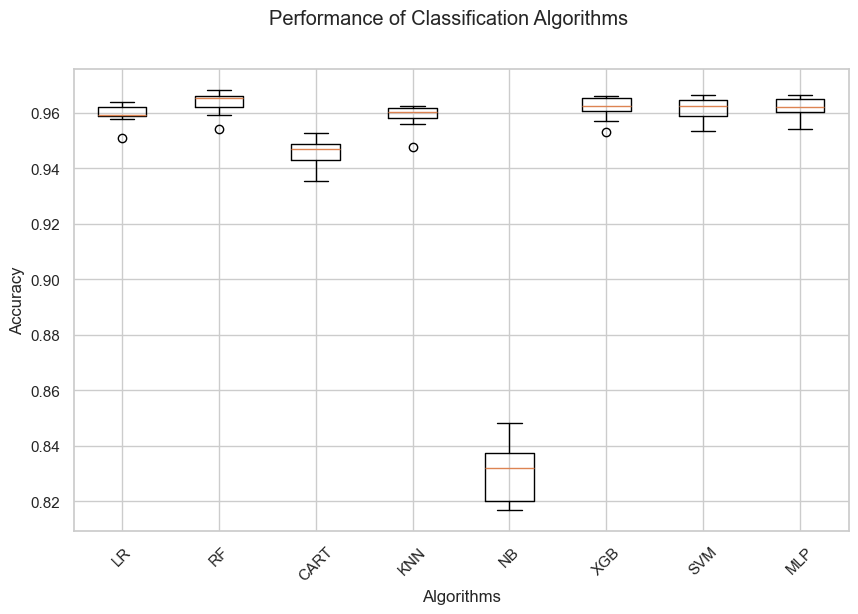

In [87]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))

# Results and names to store performance
results = []
names = []

# Set random seed and number of splits for cross-validation
seed = 42
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

# Cross-validation for each model
for name, model in models:
    # Perform cross-validation
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    
    # Print results for each model
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot visualization for model performance
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Performance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.show()


## Final Model Selection

## 8.Insights and Recommendations

## Business Insights from EDA

## Actionable Strategies for the Bank Marketing Team

## 9.Challenges Faced

## Data Challenges and Solutions

## Modeling Challenges and Solutions

## 10.Conclusion 

## Summary of Findings

## 11.Recommendations

## More appropriate timing

## Smarter marketing design

## Better services provision